[02-06 12:15:42][INFO] Se ajustarán 3 parámetros.
[02-06 12:15:42][INFO] 
[[ 214.18604567   61.6479       20.           24.7861    ]
 [   0.          -17.57011186  -13.53914045    9.4986119 ]
 [   0.         -112.51779515  -83.54300563   78.89917291]]
[02-06 12:15:42][INFO] 
[[214.18604567  61.6479      20.          24.7861    ]
 [  0.         -17.57011186 -13.53914045   9.4986119 ]
 [  0.           0.           3.16072415  18.07071169]]


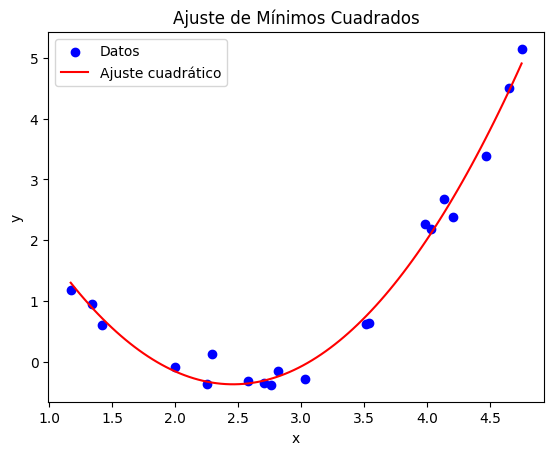

El error relativo cuadrático es 0.3786671209558097
[02-06 12:15:42][INFO] Se ajustarán 2 parámetros.
[02-06 12:15:42][INFO] 
[[61.6479     20.         24.7861    ]
 [ 0.         -7.83899109 16.56283549]]


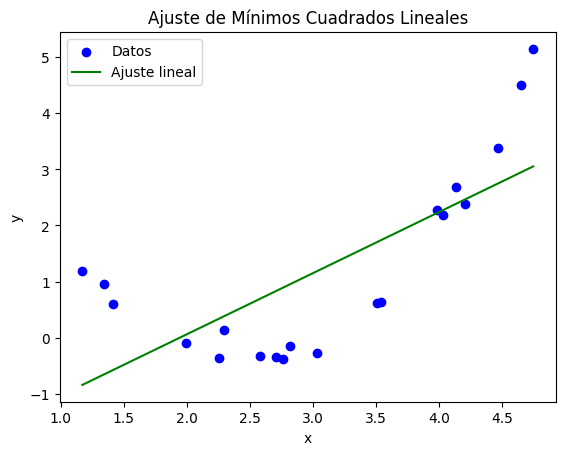

El error relativo lineal es 1.8948678846046576


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from src import ajustar_min_cuadrados

# Derivadas parciales para el sistema de ecuaciones cuadrático
def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**4 for xi in xs)
    c_1 = sum(xi**3 for xi in xs)
    c_0 = sum(xi**2 for xi in xs)
    c_ind = sum(yi * xi**2 for yi, xi in zip(ys, xs))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**3 for xi in xs)
    c_1 = sum(xi**2 for xi in xs)
    c_0 = sum(xi for xi in xs)
    c_ind = sum(yi * xi for yi, xi in zip(ys, xs))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**2 for xi in xs)
    c_1 = sum(xi for xi in xs)
    c_0 = len(xs)
    c_ind = sum(ys)
    return (c_2, c_1, c_0, c_ind)

# Función cuadrática ajustada
def funcion_cuadratica(x: float, pars: tuple[float, float, float]) -> float: 
    a2, a1, a0 = pars
    return a2*x**2 + a1*x + a0

# Datos xs e ys
xs = [
    1.1715, 1.3396, 1.4163, 1.9962, 2.2523, 2.2947, 2.5793, 2.7054, 2.7635,
    2.8200, 3.0317, 3.5111, 3.5393, 3.9829, 4.0323, 4.1353, 4.2084, 4.4683,
    4.6509, 4.7489
]

ys = [
    1.1902, 0.9564, 0.6078, -0.0856, -0.3550, 0.1355, -0.3171, -0.3425, -0.3758,
    -0.1518, -0.2767, 0.6251, 0.6447, 2.2733, 2.1789, 2.6781, 2.3818, 3.3786,
    4.4971, 5.1431
]

# Ajuste cuadrático
pars1 = ajustar_min_cuadrados(xs, ys, gradiente = [der_parcial_2, der_parcial_1, der_parcial_0])

# Crear el rango de valores de x para graficar la función ajustada
x = np.linspace(min(xs), max(xs), 100)
y = [funcion_cuadratica(xi, pars1) for xi in x]

# Graficar los resultados
plt.scatter(xs, ys, label="Datos", color="blue")
plt.plot(x, y, color="red", label="Ajuste cuadrático")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste de Mínimos Cuadrados")
plt.legend()
plt.show()

# Cálculo del error cuadrático relativo
error_relativo = np.mean([abs(y_real - funcion_cuadratica(x_real, pars1))/abs(y_real) for y_real, x_real in zip(ys, xs)])
print(f"El error relativo cuadrático es {error_relativo}")

# Derivadas parciales para el sistema de ecuaciones lineales
def der_parcial_lin_1(xs: list, ys: list) -> tuple[float, float, float]:
    c_ind = sum(ys)
    c_1 = sum(xs)
    c_0 = len(xs)
    return (c_1, c_0, c_ind)

def der_parcial_lin_0(xs: list, ys: list) -> tuple[float, float, float]:
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        c_ind += xi * yi
        c_1 += xi * xi
        c_0 += xi
    return (c_1, c_0, c_ind)

# Función lineal ajustada
def funcion_lineal(x: float, pars: tuple[float, float]) -> float:
    a1, a0 = pars
    return a1*x + a0

# Ajuste lineal
pars2 = ajustar_min_cuadrados(xs, ys, gradiente = [der_parcial_lin_0, der_parcial_lin_1])

# Graficar el ajuste lineal
y_lineal = [funcion_lineal(xi, pars2) for xi in x]

plt.scatter(xs, ys, label="Datos", color="blue")
plt.plot(x, y_lineal, color="green", label="Ajuste lineal")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste de Mínimos Cuadrados Lineales")
plt.legend()
plt.show()

# Cálculo del error relativo lineal
error_relativo_lineal = np.mean([abs(y_real - funcion_lineal(x_real, pars2))/abs(y_real) for y_real, x_real in zip(ys, xs)])
print(f"El error relativo lineal es {error_relativo_lineal}")

[02-06 12:39:59][INFO] 2025-02-06 12:39:59.662542
[02-06 12:39:59][INFO] fredd| 2025-02-06 12:39:59.665541
[02-06 12:39:59][INFO] 2025-02-06 12:39:59.666542
[02-06 12:39:59][INFO] fredd| 2025-02-06 12:39:59.668543
[02-06 12:39:59][INFO] Se ajustarán 3 parámetros.
[02-06 12:39:59][INFO] 
[[ 31670.67        -2500.            200.           5609.96      ]
 [     0.           -409.49478654     66.41318292   1013.12129835]
 [     0.          10293.18391536  -1664.79471323 -25465.95698513]]
[02-06 12:39:59][INFO] 
[[ 3.16706700e+04 -2.50000000e+03  2.00000000e+02  5.60996000e+03]
 [ 0.00000000e+00 -4.09494787e+02  6.64131829e+01  1.01312130e+03]
 [ 0.00000000e+00  0.00000000e+00  4.58699493e+00  1.64185064e-01]]


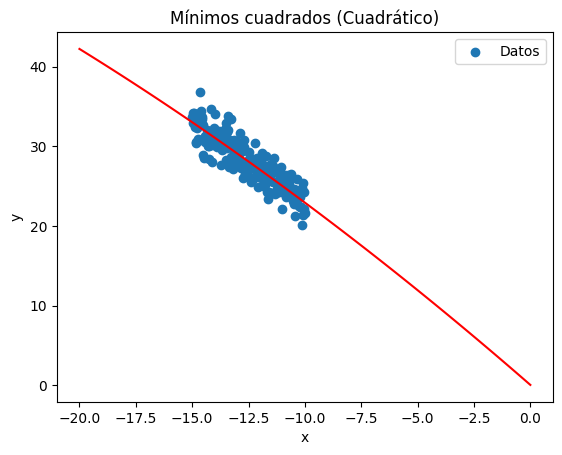

El error relativo cuadrático es 0.04317825650416966
[02-06 12:39:59][INFO] Se ajustarán 2 parámetros.
[02-06 12:39:59][INFO] 
[[-2.50000000e+03  2.00000000e+02  5.60996000e+03]
 [ 3.63797881e-12  3.36536000e+01  9.42215493e+01]]


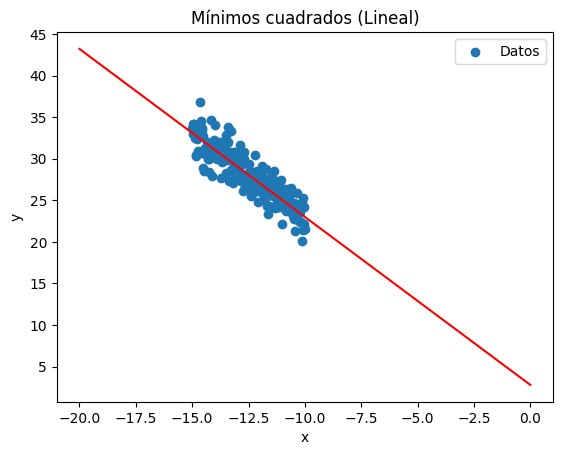

El error relativo lineal es 0.043177450171763526


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from src import ajustar_min_cuadrados

def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**4 for xi in xs)
    c_1 = sum(xi**3 for xi in xs)
    c_0 = sum(xi**2 for xi in xs)
    c_ind = sum(yi * xi**2 for yi, xi in zip(ys, xs))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**3 for xi in xs)
    c_1 = sum(xi**2 for xi in xs)
    c_0 = sum(xi for xi in xs)
    c_ind = sum(yi * xi for yi, xi in zip(ys, xs))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**2 for xi in xs)
    c_1 = sum(xi for xi in xs)
    c_0 = len(xs)
    c_ind = sum(ys)
    return (c_2, c_1, c_0, c_ind)

def funcion_cuadratica(x: float, pars: tuple[float, float, float]) -> float: 
    a2, a1, a0 = pars
    return a2*x**2 + a1*x + a0

xs = [
    -10.08, -10.83, -12.36, -11.06, -11.16, -13.79, -14.92, -12.01, -14.9, -11.26,
    -10.13, -15.0, -13.22, -10.65, -10.88, -12.39, -13.54, -13.69, -11.61, -14.6,
    -10.63, -12.16, -12.64, -14.12, -10.4, -10.25, -14.95, -11.68, -12.96, -10.2,
    -11.83, -13.62, -13.27, -12.46, -14.7, -13.52, -13.44, -12.84, -10.73, -13.92,
    -10.23, -10.1, -13.34, -14.82, -14.97, -14.85, -10.28, -14.52, -11.33, -13.24,
    -10.53, -14.57, -10.78, -13.07, -14.5, -14.77, -12.04, -13.97, -11.63, -13.72,
    -13.87, -10.75, -11.76, -12.14, -14.37, -10.6, -13.67, -10.8, -12.59, -13.17,
    -14.45, -11.53, -11.13, -13.84, -12.09, -13.29, -12.94, -12.54, -12.76, -11.81,
    -10.35, -13.57, -11.18, -11.43, -11.21, -10.43, -12.69, -12.91, -13.89, -14.55,
    -12.89, -11.96, -10.33, -13.94, -10.9, -12.56, -11.91, -14.1, -10.55, -13.32,
    -11.71, -10.03, -12.34, -11.58, -11.88, -14.87, -14.2, -14.72, -11.78, -12.51,
    -13.19, -12.79, -12.81, -14.15, -12.71, -14.35, -11.66, -10.38, -11.48, -11.56,
    -11.51, -12.74, -13.12, -14.75, -10.93, -10.85, -14.07, -10.18, -11.98, -14.42,
    -13.99, -10.0, -12.61, -12.26, -12.99, -10.58, -11.23, -14.62, -12.11, -12.21,
    -11.11, -12.66, -13.59, -14.8, -13.09, -12.29, -13.64, -10.15, -14.32, -11.41,
    -14.25, -11.28, -10.45, -14.67, -14.47, -10.68, -11.38, -13.77, -10.5, -11.01,
    -14.05, -14.3, -12.31, -13.47, -13.02, -12.49, -13.14, -12.41, -11.08, -11.36,
    -10.05, -13.37, -10.98, -12.24, -13.82, -14.17, -12.06, -13.49, -13.04, -11.46,
    -14.02, -13.42, -12.44, -10.95, -10.3, -11.93, -13.39, -14.65, -12.86, -12.19,
    -10.7, -14.27, -11.31, -14.4, -11.73, -14.22, -10.48, -11.86, -11.03, -13.74,
]

ys = [
    25.33, 24.68, 27.52, 25.46, 27.04, 30.29, 33.39, 27.49, 34.13, 25.45,
    24.72, 33.7, 28.49, 26.09, 24.92, 25.53, 32.22, 29.58, 24.3, 33.44,
    26.51, 26.98, 26.44, 27.97, 24.54, 24.25, 34.13, 24.31, 28.55, 23.6,
    27.07, 30.31, 33.37, 28.38, 33.88, 32.87, 29.83, 27.3, 26.37, 31.98,
    22.35, 21.4, 30.77, 30.5, 32.95, 30.36, 22.45, 32.67, 24.07, 29.86,
    23.07, 33.73, 24.89, 30.66, 28.85, 33.32, 27.16, 30.62, 23.4, 27.65,
    31.33, 25.1, 25.18, 28.52, 31.16, 23.93, 30.84, 25.55, 27.06, 27.1,
    30.51, 26.1, 24.21, 31.65, 27.55, 28.63, 28.58, 27.98, 26.07, 26.07,
    25.85, 30.28, 24.22, 25.51, 24.38, 23.76, 30.84, 29.91, 29.94, 33.48,
    31.68, 26.04, 23.65, 31.14, 26.41, 26.85, 29.16, 31.43, 23.35, 30.19,
    28.78, 24.25, 25.74, 26.85, 27.39, 32.48, 31.72, 34.07, 26.86, 27.63,
    29.63, 27.86, 27.45, 30.29, 29.94, 32.06, 26.54, 22.77, 25.59, 27.28,
    27.82, 29.42, 29.9, 30.93, 24.13, 23.66, 30.2, 22.42, 28.01, 31.32,
    34.08, 21.57, 26.59, 27.68, 30.34, 23.49, 24.62, 34.49, 26.31, 30.45,
    26.27, 26.58, 31.06, 32.36, 27.87, 27.6, 30.29, 20.07, 29.98, 27.5,
    29.99, 24.41, 21.25, 30.74, 28.47, 24.88, 26.74, 31.8, 22.8, 22.12,
    31.58, 30.7, 28.38, 31.83, 28.58, 29.32, 30.77, 27.26, 27.45, 28.49,
    22.11, 27.35, 25.01, 25.99, 31.95, 34.65, 24.83, 28.3, 29.17, 27.55,
    32.3, 32.05, 26.13, 25.53, 24.09, 28.21, 33.84, 36.87, 27.72, 27.73,
    25.55, 28.44, 25.51, 30.61, 27.57, 31.07, 24.65, 25.01, 25.44, 30.65,
]

# Ajuste cuadrático
pars1 = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_2, der_parcial_1, der_parcial_0])

x = np.linspace(-20, 0, 100)
y = [funcion_cuadratica(xi, pars1) for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mínimos cuadrados (Cuadrático)")
plt.legend()
plt.show()

# Error cuadrático
error_relativo = np.mean([abs(y_real - funcion_cuadratica(x_real, pars1))/abs(y_real) for y_real, x_real in zip(ys, xs)])
print(f"El error relativo cuadrático es {error_relativo}")

# Derivadas parciales para ajuste lineal
def der_parcial_lin_1(xs: list, ys: list) -> tuple[float, float, float]:
    c_ind = sum(ys)
    c_1 = sum(xs)
    c_0 = len(xs)
    return (c_1, c_0, c_ind)

def der_parcial_lin_0(xs: list, ys: list) -> tuple[float, float, float]:
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        c_ind += xi * yi
        c_1 += xi * xi
        c_0 += xi
    return (c_1, c_0, c_ind)

def funcion_lineal(x: float, pars: tuple[float, float]) -> float:
    a1, a0 = pars
    return a1*x + a0

# Ajuste lineal
pars2 = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_lin_0, der_parcial_lin_1])

x = np.linspace(-20, 0, 100)
y = [funcion_lineal(xi, pars2) for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mínimos cuadrados (Lineal)")
plt.legend()
plt.show()

# Error lineal
error_relativo = np.mean([abs(y_real - funcion_lineal(x_real, pars2))/abs(y_real) for y_real, x_real in zip(ys, xs)])
print(f"El error relativo lineal es {error_relativo}")

[02-06 12:47:03][INFO] Se ajustarán 2 parámetros.
[02-06 12:47:03][INFO] 
[[-2.50000000e+03  2.00000000e+02  5.60996000e+03]
 [ 3.63797881e-12  3.36536000e+01  9.42215493e+01]]


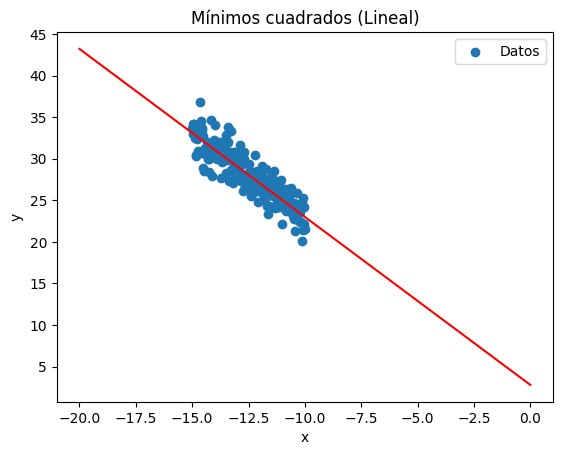

El error relativo lineal es 0.043177450171763526


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from src import ajustar_min_cuadrados

def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    c_1 = sum(xs)
    c_0 = len(xs)
    c_ind = sum(ys)
    return (c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        c_ind += xi * yi
        c_1 += xi * xi
        c_0 += xi
    return (c_1, c_0, c_ind)

def funcion_lineal(x: float, pars: tuple[float, float]) -> float:
    a1, a0 = pars
    return a1*x + a0

xs = [
    -10.08, -10.83, -12.36, -11.06, -11.16, -13.79, -14.92, -12.01, -14.9, -11.26,
    -10.13, -15.0, -13.22, -10.65, -10.88, -12.39, -13.54, -13.69, -11.61, -14.6,
    -10.63, -12.16, -12.64, -14.12, -10.4, -10.25, -14.95, -11.68, -12.96, -10.2,
    -11.83, -13.62, -13.27, -12.46, -14.7, -13.52, -13.44, -12.84, -10.73, -13.92,
    -10.23, -10.1, -13.34, -14.82, -14.97, -14.85, -10.28, -14.52, -11.33, -13.24,
    -10.53, -14.57, -10.78, -13.07, -14.5, -14.77, -12.04, -13.97, -11.63, -13.72,
    -13.87, -10.75, -11.76, -12.14, -14.37, -10.6, -13.67, -10.8, -12.59, -13.17,
    -14.45, -11.53, -11.13, -13.84, -12.09, -13.29, -12.94, -12.54, -12.76, -11.81,
    -10.35, -13.57, -11.18, -11.43, -11.21, -10.43, -12.69, -12.91, -13.89, -14.55,
    -12.89, -11.96, -10.33, -13.94, -10.9, -12.56, -11.91, -14.1, -10.55, -13.32,
    -11.71, -10.03, -12.34, -11.58, -11.88, -14.87, -14.2, -14.72, -11.78, -12.51,
    -13.19, -12.79, -12.81, -14.15, -12.71, -14.35, -11.66, -10.38, -11.48, -11.56,
    -11.51, -12.74, -13.12, -14.75, -10.93, -10.85, -14.07, -10.18, -11.98, -14.42,
    -13.99, -10.0, -12.61, -12.26, -12.99, -10.58, -11.23, -14.62, -12.11, -12.21,
    -11.11, -12.66, -13.59, -14.8, -13.09, -12.29, -13.64, -10.15, -14.32, -11.41,
    -14.25, -11.28, -10.45, -14.67, -14.47, -10.68, -11.38, -13.77, -10.5, -11.01,
    -14.05, -14.3, -12.31, -13.47, -13.02, -12.49, -13.14, -12.41, -11.08, -11.36,
    -10.05, -13.37, -10.98, -12.24, -13.82, -14.17, -12.06, -13.49, -13.04, -11.46,
    -14.02, -13.42, -12.44, -10.95, -10.3, -11.93, -13.39, -14.65, -12.86, -12.19,
    -10.7, -14.27, -11.31, -14.4, -11.73, -14.22, -10.48, -11.86, -11.03, -13.74,
]

ys = [
    25.33, 24.68, 27.52, 25.46, 27.04, 30.29, 33.39, 27.49, 34.13, 25.45,
    24.72, 33.7, 28.49, 26.09, 24.92, 25.53, 32.22, 29.58, 24.3, 33.44,
    26.51, 26.98, 26.44, 27.97, 24.54, 24.25, 34.13, 24.31, 28.55, 23.6,
    27.07, 30.31, 33.37, 28.38, 33.88, 32.87, 29.83, 27.3, 26.37, 31.98,
    22.35, 21.4, 30.77, 30.5, 32.95, 30.36, 22.45, 32.67, 24.07, 29.86,
    23.07, 33.73, 24.89, 30.66, 28.85, 33.32, 27.16, 30.62, 23.4, 27.65,
    31.33, 25.1, 25.18, 28.52, 31.16, 23.93, 30.84, 25.55, 27.06, 27.1,
    30.51, 26.1, 24.21, 31.65, 27.55, 28.63, 28.58, 27.98, 26.07, 26.07,
    25.85, 30.28, 24.22, 25.51, 24.38, 23.76, 30.84, 29.91, 29.94, 33.48,
    31.68, 26.04, 23.65, 31.14, 26.41, 26.85, 29.16, 31.43, 23.35, 30.19,
    28.78, 24.25, 25.74, 26.85, 27.39, 32.48, 31.72, 34.07, 26.86, 27.63,
    29.63, 27.86, 27.45, 30.29, 29.94, 32.06, 26.54, 22.77, 25.59, 27.28,
    27.82, 29.42, 29.9, 30.93, 24.13, 23.66, 30.2, 22.42, 28.01, 31.32,
    34.08, 21.57, 26.59, 27.68, 30.34, 23.49, 24.62, 34.49, 26.31, 30.45,
    26.27, 26.58, 31.06, 32.36, 27.87, 27.6, 30.29, 20.07, 29.98, 27.5,
    29.99, 24.41, 21.25, 30.74, 28.47, 24.88, 26.74, 31.8, 22.8, 22.12,
    31.58, 30.7, 28.38, 31.83, 28.58, 29.32, 30.77, 27.26, 27.45, 28.49,
    22.11, 27.35, 25.01, 25.99, 31.95, 34.65, 24.83, 28.3, 29.17, 27.55,
    32.3, 32.05, 26.13, 25.53, 24.09, 28.21, 33.84, 36.87, 27.72, 27.73,
    25.55, 28.44, 25.51, 30.61, 27.57, 31.07, 24.65, 25.01, 25.44, 30.65,
]

# Definir las funciones de derivadas parciales
gradiente = [der_parcial_1, der_parcial_0]

# Llamar a la función ajustar_min_cuadrados con los coeficientes obtenidos
pars = ajustar_min_cuadrados(xs, ys, gradiente)

# Visualización del ajuste lineal
x = np.linspace(-20, 0, 100)
y = [funcion_lineal(xi, pars) for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mínimos cuadrados (Lineal)")
plt.legend()
plt.show()

# Error lineal
error_relativo = np.mean([abs(y_real - funcion_lineal(x_real, pars))/abs(y_real) for y_real, x_real in zip(ys, xs)])
print(f"El error relativo lineal es {error_relativo}")

[02-06 12:54:05][INFO] Se ajustarán 2 parámetros.
[02-06 12:54:05][INFO] 
[[-2.50000000e+03  2.00000000e+02  5.60996000e+03]
 [ 3.63797881e-12  3.36536000e+01  9.42215493e+01]]


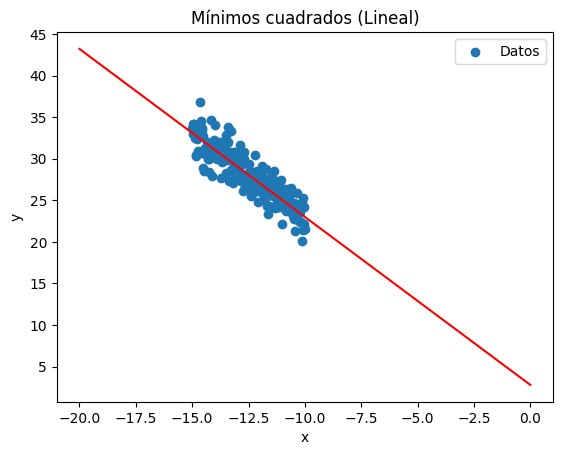

El error relativo lineal es 0.043177450171763526


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from src import ajustar_min_cuadrados

# Derivadas parciales para regresión lineal
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    c_ind = sum(ys)
    c_1 = sum(xs)
    c_0 = len(xs)
    return (c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        c_ind += xi * yi
        c_1 += xi * xi
        c_0 += xi
    return (c_1, c_0, c_ind)

def funcion_lineal(x: float, pars: tuple[float, float]) -> float:
    a1, a0 = pars
    return a1*x + a0

xs = [
    -10.08, -10.83, -12.36, -11.06, -11.16, -13.79, -14.92, -12.01, -14.9, -11.26,
    -10.13, -15.0, -13.22, -10.65, -10.88, -12.39, -13.54, -13.69, -11.61, -14.6,
    -10.63, -12.16, -12.64, -14.12, -10.4, -10.25, -14.95, -11.68, -12.96, -10.2,
    -11.83, -13.62, -13.27, -12.46, -14.7, -13.52, -13.44, -12.84, -10.73, -13.92,
    -10.23, -10.1, -13.34, -14.82, -14.97, -14.85, -10.28, -14.52, -11.33, -13.24,
    -10.53, -14.57, -10.78, -13.07, -14.5, -14.77, -12.04, -13.97, -11.63, -13.72,
    -13.87, -10.75, -11.76, -12.14, -14.37, -10.6, -13.67, -10.8, -12.59, -13.17,
    -14.45, -11.53, -11.13, -13.84, -12.09, -13.29, -12.94, -12.54, -12.76, -11.81,
    -10.35, -13.57, -11.18, -11.43, -11.21, -10.43, -12.69, -12.91, -13.89, -14.55,
    -12.89, -11.96, -10.33, -13.94, -10.9, -12.56, -11.91, -14.1, -10.55, -13.32,
    -11.71, -10.03, -12.34, -11.58, -11.88, -14.87, -14.2, -14.72, -11.78, -12.51,
    -13.19, -12.79, -12.81, -14.15, -12.71, -14.35, -11.66, -10.38, -11.48, -11.56,
    -11.51, -12.74, -13.12, -14.75, -10.93, -10.85, -14.07, -10.18, -11.98, -14.42,
    -13.99, -10.0, -12.61, -12.26, -12.99, -10.58, -11.23, -14.62, -12.11, -12.21,
    -11.11, -12.66, -13.59, -14.8, -13.09, -12.29, -13.64, -10.15, -14.32, -11.41,
    -14.25, -11.28, -10.45, -14.67, -14.47, -10.68, -11.38, -13.77, -10.5, -11.01,
    -14.05, -14.3, -12.31, -13.47, -13.02, -12.49, -13.14, -12.41, -11.08, -11.36,
    -10.05, -13.37, -10.98, -12.24, -13.82, -14.17, -12.06, -13.49, -13.04, -11.46,
    -14.02, -13.42, -12.44, -10.95, -10.3, -11.93, -13.39, -14.65, -12.86, -12.19,
    -10.7, -14.27, -11.31, -14.4, -11.73, -14.22, -10.48, -11.86, -11.03, -13.74,
]

ys = [
    25.33, 24.68, 27.52, 25.46, 27.04, 30.29, 33.39, 27.49, 34.13, 25.45,
    24.72, 33.7, 28.49, 26.09, 24.92, 25.53, 32.22, 29.58, 24.3, 33.44,
    26.51, 26.98, 26.44, 27.97, 24.54, 24.25, 34.13, 24.31, 28.55, 23.6,
    27.07, 30.31, 33.37, 28.38, 33.88, 32.87, 29.83, 27.3, 26.37, 31.98,
    22.35, 21.4, 30.77, 30.5, 32.95, 30.36, 22.45, 32.67, 24.07, 29.86,
    23.07, 33.73, 24.89, 30.66, 28.85, 33.32, 27.16, 30.62, 23.4, 27.65,
    31.33, 25.1, 25.18, 28.52, 31.16, 23.93, 30.84, 25.55, 27.06, 27.1,
    30.51, 26.1, 24.21, 31.65, 27.55, 28.63, 28.58, 27.98, 26.07, 26.07,
    25.85, 30.28, 24.22, 25.51, 24.38, 23.76, 30.84, 29.91, 29.94, 33.48,
    31.68, 26.04, 23.65, 31.14, 26.41, 26.85, 29.16, 31.43, 23.35, 30.19,
    28.78, 24.25, 25.74, 26.85, 27.39, 32.48, 31.72, 34.07, 26.86, 27.63,
    29.63, 27.86, 27.45, 30.29, 29.94, 32.06, 26.54, 22.77, 25.59, 27.28,
    27.82, 29.42, 29.9, 30.93, 24.13, 23.66, 30.2, 22.42, 28.01, 31.32,
    34.08, 21.57, 26.59, 27.68, 30.34, 23.49, 24.62, 34.49, 26.31, 30.45,
    26.27, 26.58, 31.06, 32.36, 27.87, 27.6, 30.29, 20.07, 29.98, 27.5,
    29.99, 24.41, 21.25, 30.74, 28.47, 24.88, 26.74, 31.8, 22.8, 22.12,
    31.58, 30.7, 28.38, 31.83, 28.58, 29.32, 30.77, 27.26, 27.45, 28.49,
    22.11, 27.35, 25.01, 25.99, 31.95, 34.65, 24.83, 28.3, 29.17, 27.55,
    32.3, 32.05, 26.13, 25.53, 24.09, 28.21, 33.84, 36.87, 27.72, 27.73,
    25.55, 28.44, 25.51, 30.61, 27.57, 31.07, 24.65, 25.01, 25.44, 30.65,
]

# Definir las funciones de derivadas parciales
gradiente = [der_parcial_1, der_parcial_0]

# Llamar a la función ajustar_min_cuadrados con los coeficientes obtenidos
pars = ajustar_min_cuadrados(xs, ys, gradiente)

# Visualización del ajuste lineal
x = np.linspace(-20, 0, 100)
y = [funcion_lineal(xi, pars) for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mínimos cuadrados (Lineal)")
plt.legend()
plt.show()

# Error lineal
error_relativo = np.mean([abs(y_real - funcion_lineal(x_real, pars))/abs(y_real) for y_real, x_real in zip(ys, xs)])
print(f"El error relativo lineal es {error_relativo}")

[02-06 12:56:06][INFO] Se ajustarán 3 parámetros.
[02-06 12:56:06][INFO] 
[[ 31670.67        -2500.            200.           5609.96      ]
 [     0.           -409.49478654     66.41318292   1013.12129835]
 [     0.          10293.18391536  -1664.79471323 -25465.95698513]]
[02-06 12:56:06][INFO] 
[[ 3.16706700e+04 -2.50000000e+03  2.00000000e+02  5.60996000e+03]
 [ 0.00000000e+00 -4.09494787e+02  6.64131829e+01  1.01312130e+03]
 [ 0.00000000e+00  0.00000000e+00  4.58699493e+00  1.64185064e-01]]


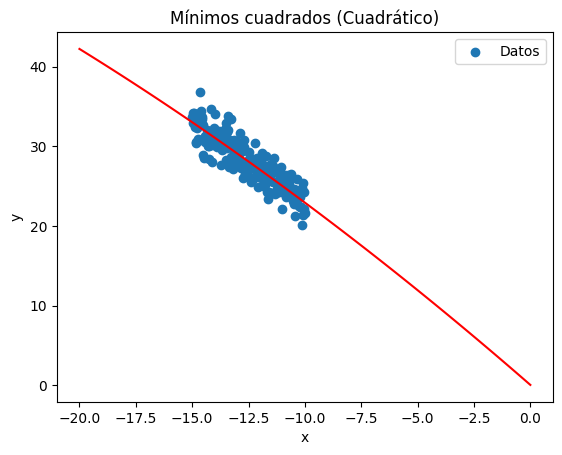

El error relativo cuadrático es 0.04317825650416966


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from src import ajustar_min_cuadrados

# Derivadas parciales para regresión cuadrática
def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**4 for xi in xs)
    c_1 = sum(xi**3 for xi in xs)
    c_0 = sum(xi**2 for xi in xs)
    c_ind = sum(yi * xi**2 for yi, xi in zip(ys, xs))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**3 for xi in xs)
    c_1 = sum(xi**2 for xi in xs)
    c_0 = sum(xi for xi in xs)
    c_ind = sum(yi * xi for yi, xi in zip(ys, xs))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**2 for xi in xs)
    c_1 = sum(xi for xi in xs)
    c_0 = len(xs)
    c_ind = sum(ys)
    return (c_2, c_1, c_0, c_ind)

def funcion_cuadratica(x: float, pars: tuple[float, float, float]) -> float: 
    a2, a1, a0 = pars
    return a2*x**2 + a1*x + a0

xs = [
    -10.08, -10.83, -12.36, -11.06, -11.16, -13.79, -14.92, -12.01, -14.9, -11.26,
    -10.13, -15.0, -13.22, -10.65, -10.88, -12.39, -13.54, -13.69, -11.61, -14.6,
    -10.63, -12.16, -12.64, -14.12, -10.4, -10.25, -14.95, -11.68, -12.96, -10.2,
    -11.83, -13.62, -13.27, -12.46, -14.7, -13.52, -13.44, -12.84, -10.73, -13.92,
    -10.23, -10.1, -13.34, -14.82, -14.97, -14.85, -10.28, -14.52, -11.33, -13.24,
    -10.53, -14.57, -10.78, -13.07, -14.5, -14.77, -12.04, -13.97, -11.63, -13.72,
    -13.87, -10.75, -11.76, -12.14, -14.37, -10.6, -13.67, -10.8, -12.59, -13.17,
    -14.45, -11.53, -11.13, -13.84, -12.09, -13.29, -12.94, -12.54, -12.76, -11.81,
    -10.35, -13.57, -11.18, -11.43, -11.21, -10.43, -12.69, -12.91, -13.89, -14.55,
    -12.89, -11.96, -10.33, -13.94, -10.9, -12.56, -11.91, -14.1, -10.55, -13.32,
    -11.71, -10.03, -12.34, -11.58, -11.88, -14.87, -14.2, -14.72, -11.78, -12.51,
    -13.19, -12.79, -12.81, -14.15, -12.71, -14.35, -11.66, -10.38, -11.48, -11.56,
    -11.51, -12.74, -13.12, -14.75, -10.93, -10.85, -14.07, -10.18, -11.98, -14.42,
    -13.99, -10.0, -12.61, -12.26, -12.99, -10.58, -11.23, -14.62, -12.11, -12.21,
    -11.11, -12.66, -13.59, -14.8, -13.09, -12.29, -13.64, -10.15, -14.32, -11.41,
    -14.25, -11.28, -10.45, -14.67, -14.47, -10.68, -11.38, -13.77, -10.5, -11.01,
    -14.05, -14.3, -12.31, -13.47, -13.02, -12.49, -13.14, -12.41, -11.08, -11.36,
    -10.05, -13.37, -10.98, -12.24, -13.82, -14.17, -12.06, -13.49, -13.04, -11.46,
    -14.02, -13.42, -12.44, -10.95, -10.3, -11.93, -13.39, -14.65, -12.86, -12.19,
    -10.7, -14.27, -11.31, -14.4, -11.73, -14.22, -10.48, -11.86, -11.03, -13.74,
]

ys = [
    25.33, 24.68, 27.52, 25.46, 27.04, 30.29, 33.39, 27.49, 34.13, 25.45,
    24.72, 33.7, 28.49, 26.09, 24.92, 25.53, 32.22, 29.58, 24.3, 33.44,
    26.51, 26.98, 26.44, 27.97, 24.54, 24.25, 34.13, 24.31, 28.55, 23.6,
    27.07, 30.31, 33.37, 28.38, 33.88, 32.87, 29.83, 27.3, 26.37, 31.98,
    22.35, 21.4, 30.77, 30.5, 32.95, 30.36, 22.45, 32.67, 24.07, 29.86,
    23.07, 33.73, 24.89, 30.66, 28.85, 33.32, 27.16, 30.62, 23.4, 27.65,
    31.33, 25.1, 25.18, 28.52, 31.16, 23.93, 30.84, 25.55, 27.06, 27.1,
    30.51, 26.1, 24.21, 31.65, 27.55, 28.63, 28.58, 27.98, 26.07, 26.07,
    25.85, 30.28, 24.22, 25.51, 24.38, 23.76, 30.84, 29.91, 29.94, 33.48,
    31.68, 26.04, 23.65, 31.14, 26.41, 26.85, 29.16, 31.43, 23.35, 30.19,
    28.78, 24.25, 25.74, 26.85, 27.39, 32.48, 31.72, 34.07, 26.86, 27.63,
    29.63, 27.86, 27.45, 30.29, 29.94, 32.06, 26.54, 22.77, 25.59, 27.28,
    27.82, 29.42, 29.9, 30.93, 24.13, 23.66, 30.2, 22.42, 28.01, 31.32,
    34.08, 21.57, 26.59, 27.68, 30.34, 23.49, 24.62, 34.49, 26.31, 30.45,
    26.27, 26.58, 31.06, 32.36, 27.87, 27.6, 30.29, 20.07, 29.98, 27.5,
    29.99, 24.41, 21.25, 30.74, 28.47, 24.88, 26.74, 31.8, 22.8, 22.12,
    31.58, 30.7, 28.38, 31.83, 28.58, 29.32, 30.77, 27.26, 27.45, 28.49,
    22.11, 27.35, 25.01, 25.99, 31.95, 34.65, 24.83, 28.3, 29.17, 27.55,
    32.3, 32.05, 26.13, 25.53, 24.09, 28.21, 33.84, 36.87, 27.72, 27.73,
    25.55, 28.44, 25.51, 30.61, 27.57, 31.07, 24.65, 25.01, 25.44, 30.65,
]

# Definir las funciones de derivadas parciales
gradiente = [der_parcial_2, der_parcial_1, der_parcial_0]

# Llamar a la función ajustar_min_cuadrados con los coeficientes obtenidos
pars = ajustar_min_cuadrados(xs, ys, gradiente)

# Visualización del ajuste cuadrático
x = np.linspace(-20, 0, 100)
y = [funcion_cuadratica(xi, pars) for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mínimos cuadrados (Cuadrático)")
plt.legend()
plt.show()

# Error cuadrático
error_relativo = np.mean([abs(y_real - funcion_cuadratica(x_real, pars))/abs(y_real) for y_real, x_real in zip(ys, xs)])
print(f"El error relativo cuadrático es {error_relativo}")

[02-06 12:58:36][INFO] Se ajustarán 2 parámetros.
[02-06 12:58:36][INFO] 
[[-2.50000000e+03  2.00000000e+02  5.60996000e+03]
 [ 3.63797881e-12  3.36536000e+01  9.42215493e+01]]


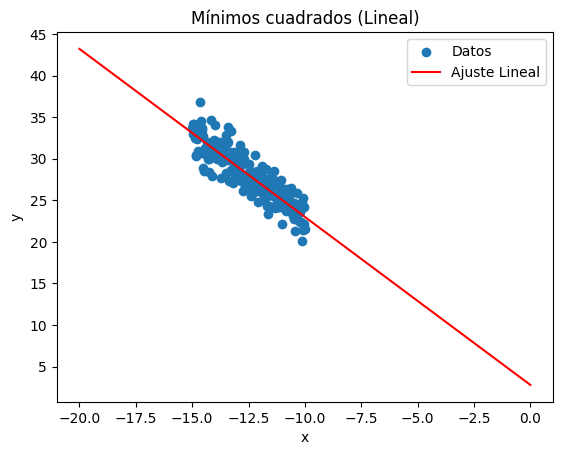

El error relativo lineal es 0.043177450171763526
[02-06 12:58:36][INFO] Se ajustarán 3 parámetros.
[02-06 12:58:36][INFO] 
[[ 31670.67        -2500.            200.           5609.96      ]
 [     0.           -409.49478654     66.41318292   1013.12129835]
 [     0.          10293.18391536  -1664.79471323 -25465.95698513]]
[02-06 12:58:36][INFO] 
[[ 3.16706700e+04 -2.50000000e+03  2.00000000e+02  5.60996000e+03]
 [ 0.00000000e+00 -4.09494787e+02  6.64131829e+01  1.01312130e+03]
 [ 0.00000000e+00  0.00000000e+00  4.58699493e+00  1.64185064e-01]]


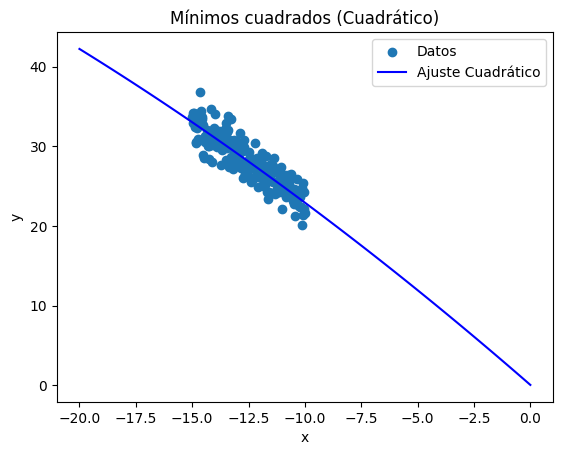

El error relativo cuadrático es 0.04317825650416966


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from src import ajustar_min_cuadrados

# Derivadas parciales para regresión lineal
def der_parcial_lin_1(xs: list, ys: list) -> tuple[float, float, float]:
    c_ind = sum(ys)
    c_1 = sum(xs)
    c_0 = len(xs)
    return (c_1, c_0, c_ind)

def der_parcial_lin_0(xs: list, ys: list) -> tuple[float, float, float]:
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        c_ind += xi * yi
        c_1 += xi * xi
        c_0 += xi
    return (c_1, c_0, c_ind)

def funcion_lineal(x: float, pars: tuple[float, float]) -> float:
    a1, a0 = pars
    return a1*x + a0

# Derivadas parciales para regresión cuadrática
def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**4 for xi in xs)
    c_1 = sum(xi**3 for xi in xs)
    c_0 = sum(xi**2 for xi in xs)
    c_ind = sum(yi * xi**2 for yi, xi in zip(ys, xs))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**3 for xi in xs)
    c_1 = sum(xi**2 for xi in xs)
    c_0 = sum(xi for xi in xs)
    c_ind = sum(yi * xi for yi, xi in zip(ys, xs))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**2 for xi in xs)
    c_1 = sum(xi for xi in xs)
    c_0 = len(xs)
    c_ind = sum(ys)
    return (c_2, c_1, c_0, c_ind)

def funcion_cuadratica(x: float, pars: tuple[float, float, float]) -> float: 
    a2, a1, a0 = pars
    return a2*x**2 + a1*x + a0

xs = [
    -10.08, -10.83, -12.36, -11.06, -11.16, -13.79, -14.92, -12.01, -14.9, -11.26,
    -10.13, -15.0, -13.22, -10.65, -10.88, -12.39, -13.54, -13.69, -11.61, -14.6,
    -10.63, -12.16, -12.64, -14.12, -10.4, -10.25, -14.95, -11.68, -12.96, -10.2,
    -11.83, -13.62, -13.27, -12.46, -14.7, -13.52, -13.44, -12.84, -10.73, -13.92,
    -10.23, -10.1, -13.34, -14.82, -14.97, -14.85, -10.28, -14.52, -11.33, -13.24,
    -10.53, -14.57, -10.78, -13.07, -14.5, -14.77, -12.04, -13.97, -11.63, -13.72,
    -13.87, -10.75, -11.76, -12.14, -14.37, -10.6, -13.67, -10.8, -12.59, -13.17,
    -14.45, -11.53, -11.13, -13.84, -12.09, -13.29, -12.94, -12.54, -12.76, -11.81,
    -10.35, -13.57, -11.18, -11.43, -11.21, -10.43, -12.69, -12.91, -13.89, -14.55,
    -12.89, -11.96, -10.33, -13.94, -10.9, -12.56, -11.91, -14.1, -10.55, -13.32,
    -11.71, -10.03, -12.34, -11.58, -11.88, -14.87, -14.2, -14.72, -11.78, -12.51,
    -13.19, -12.79, -12.81, -14.15, -12.71, -14.35, -11.66, -10.38, -11.48, -11.56,
    -11.51, -12.74, -13.12, -14.75, -10.93, -10.85, -14.07, -10.18, -11.98, -14.42,
    -13.99, -10.0, -12.61, -12.26, -12.99, -10.58, -11.23, -14.62, -12.11, -12.21,
    -11.11, -12.66, -13.59, -14.8, -13.09, -12.29, -13.64, -10.15, -14.32, -11.41,
    -14.25, -11.28, -10.45, -14.67, -14.47, -10.68, -11.38, -13.77, -10.5, -11.01,
    -14.05, -14.3, -12.31, -13.47, -13.02, -12.49, -13.14, -12.41, -11.08, -11.36,
    -10.05, -13.37, -10.98, -12.24, -13.82, -14.17, -12.06, -13.49, -13.04, -11.46,
    -14.02, -13.42, -12.44, -10.95, -10.3, -11.93, -13.39, -14.65, -12.86, -12.19,
    -10.7, -14.27, -11.31, -14.4, -11.73, -14.22, -10.48, -11.86, -11.03, -13.74,
]

ys = [
    25.33, 24.68, 27.52, 25.46, 27.04, 30.29, 33.39, 27.49, 34.13, 25.45,
    24.72, 33.7, 28.49, 26.09, 24.92, 25.53, 32.22, 29.58, 24.3, 33.44,
    26.51, 26.98, 26.44, 27.97, 24.54, 24.25, 34.13, 24.31, 28.55, 23.6,
    27.07, 30.31, 33.37, 28.38, 33.88, 32.87, 29.83, 27.3, 26.37, 31.98,
    22.35, 21.4, 30.77, 30.5, 32.95, 30.36, 22.45, 32.67, 24.07, 29.86,
    23.07, 33.73, 24.89, 30.66, 28.85, 33.32, 27.16, 30.62, 23.4, 27.65,
    31.33, 25.1, 25.18, 28.52, 31.16, 23.93, 30.84, 25.55, 27.06, 27.1,
    30.51, 26.1, 24.21, 31.65, 27.55, 28.63, 28.58, 27.98, 26.07, 26.07,
    25.85, 30.28, 24.22, 25.51, 24.38, 23.76, 30.84, 29.91, 29.94, 33.48,
    31.68, 26.04, 23.65, 31.14, 26.41, 26.85, 29.16, 31.43, 23.35, 30.19,
    28.78, 24.25, 25.74, 26.85, 27.39, 32.48, 31.72, 34.07, 26.86, 27.63,
    29.63, 27.86, 27.45, 30.29, 29.94, 32.06, 26.54, 22.77, 25.59, 27.28,
    27.82, 29.42, 29.9, 30.93, 24.13, 23.66, 30.2, 22.42, 28.01, 31.32,
    34.08, 21.57, 26.59, 27.68, 30.34, 23.49, 24.62, 34.49, 26.31, 30.45,
    26.27, 26.58, 31.06, 32.36, 27.87, 27.6, 30.29, 20.07, 29.98, 27.5,
    29.99, 24.41, 21.25, 30.74, 28.47, 24.88, 26.74, 31.8, 22.8, 22.12,
    31.58, 30.7, 28.38, 31.83, 28.58, 29.32, 30.77, 27.26, 27.45, 28.49,
    22.11, 27.35, 25.01, 25.99, 31.95, 34.65, 24.83, 28.3, 29.17, 27.55,
    32.3, 32.05, 26.13, 25.53, 24.09, 28.21, 33.84, 36.87, 27.72, 27.73,
    25.55, 28.44, 25.51, 30.61, 27.57, 31.07, 24.65, 25.01, 25.44, 30.65,
]

# Ajuste lineal
gradiente_lineal = [der_parcial_lin_0, der_parcial_lin_1]
pars_lineal = ajustar_min_cuadrados(xs, ys, gradiente_lineal)

# Visualización del ajuste lineal
x = np.linspace(-20, 0, 100)
y_lineal = [funcion_lineal(xi, pars_lineal) for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y_lineal, color="red", label="Ajuste Lineal")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mínimos cuadrados (Lineal)")
plt.legend()
plt.show()

# Error lineal
error_relativo_lineal = np.mean([abs(y_real - funcion_lineal(x_real, pars_lineal))/abs(y_real) for y_real, x_real in zip(ys, xs)])
print(f"El error relativo lineal es {error_relativo_lineal}")

# Ajuste cuadrático
gradiente_cuadratico = [der_parcial_2, der_parcial_1, der_parcial_0]
pars_cuadratico = ajustar_min_cuadrados(xs, ys, gradiente_cuadratico)

# Visualización del ajuste cuadrático
y_cuadratico = [funcion_cuadratica(xi, pars_cuadratico) for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y_cuadratico, color="blue", label="Ajuste Cuadrático")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mínimos cuadrados (Cuadrático)")
plt.legend()
plt.show()

# Error cuadrático
error_relativo_cuadratico = np.mean([abs(y_real - funcion_cuadratica(x_real, pars_cuadratico))/abs(y_real) for y_real, x_real in zip(ys, xs)])
print(f"El error relativo cuadrático es {error_relativo_cuadratico}")